# Aula 1 - Otimização unidimensional irrestrita

## Vídeo 1.2 - Entendendo o processo de precificação

As companhias aéreas, assim como aquelas que vendem passagens de ônibus, trens, etc., necessitam definir o valor das tarifas a fim de maximizar seus lucros. É notável que o lucro seja influenciado tanto pela quantidade de vendas quanto pela própria tarifa, sendo que a quantidade de vendas, por sua vez, varia de acordo com a tarifa.

Podemos denominar de "elasticidade" o parâmetro que indica o impacto da tarifa nas vendas. Por exemplo, consideremos a seguinte expressão:

$$quantidade = 388 * (1 + elasticidade * (500 - tarifa) / 500)$$

Neste contexto, o valor 388 representa uma estimativa de vendas padrão, elaborada por uma equipe especializada em análise preditiva. A elasticidade é um parâmetro derivado de dados e variações, e também, neste momento, é um valor previamente conhecido e estimado. Já a tarifa corresponde ao valor padrão da tarifa, o que geralmente é praticado e está associado implicitamente ao valor da previsão de vendas. É importante notar que, ao ajustar a tarifa conforme a elasticidade, podemos aumentar ou reduzir a quantidade de bilhetes vendidos.

Dessa forma, podemos expressar o lucro como:

$$lucro = quantidade * tarifa$$

Abaixo, criaremos essas funções em Python.

In [ ]:
def estimar_demanda(tarifa, elasticidade):
    quantidade = 388 * (1 + elasticidade * (500 - tarifa) / 500)
    return quantidade

In [ ]:
def estimar_lucro(tarifa, elasticidade):
    quantidade = estimar_demanda(tarifa, elasticidade)
    lucro = quantidade * tarifa
    return lucro

In [ ]:
tarifa = 80  # Preço fixo
elasticidade = 0.01  # Elasticidade de preço fixa

In [ ]:
demanda = estimar_demanda(tarifa, elasticidade)
lucro = estimar_lucro(tarifa, elasticidade)

In [ ]:
demanda

391.25919999999996

In [ ]:
lucro

31300.735999999997

Podemos generalizar a expressão do lucro e obter $lucro = tarifa * \displaystyle expectativa\_vendas * \left(1 + elasticidade * \frac{(tarifa\_original - tarifa)}{tarifa\_original} \right)$

É importante destacar que esta é uma equação não linear. A não linearidade se refere ao fato de que as variáveis da equação não possuem relações proporcionais ou lineares. Mais especificamente, esse problema pode ser classificado como um problema quadrático.

## Vídeo 1.3 - Detalhando a função da expectativa de demanda

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Valores de elasticidade (varie conforme necessário)
elasticidades = [round(i, 2) for i in np.linspace(-0.5, 0.5, 21)]
# Valores de preço (fixos)
tarifa = 400  # 400 ou 600 Preço fixo para este exemplo

In [ ]:
# Calcular a quantidade de tickets vendidos para cada valor de elasticidade
quantidades_vendidas = [estimar_demanda(tarifa, elasticidade) for elasticidade in elasticidades]

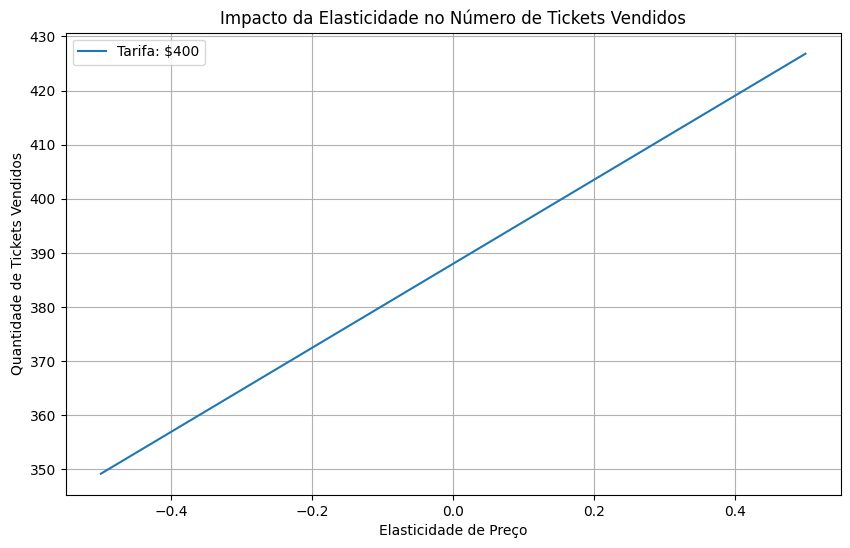

In [ ]:
#Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(elasticidades, quantidades_vendidas, label=f'Tarifa: ${tarifa}')
plt.xlabel('Elasticidade de Preço')
plt.ylabel('Quantidade de Tickets Vendidos')
plt.title('Impacto da Elasticidade no Número de Tickets Vendidos')
plt.legend()
plt.grid(True)

In [ ]:
elasticidades = elasticidades[::-1]
# Valores de tarifa (varie conforme necessário)
tarifas = np.arange(400, 600, 10)  # Varia de 90 a 110, pulando de 2 em 2

In [ ]:
# Calcular a demanda esperada para todas as combinações de tarifa e elasticidade
demandas_esperadas = np.zeros((len(elasticidades), len(tarifas)))

for i, elasticidade in enumerate(elasticidades):
    for j, tarifa_fixa in enumerate(tarifas):
        demanda_esperada = estimar_demanda(tarifa_fixa, elasticidade)
        demandas_esperadas[i, j] = demanda_esperada


In [ ]:
import seaborn as sns

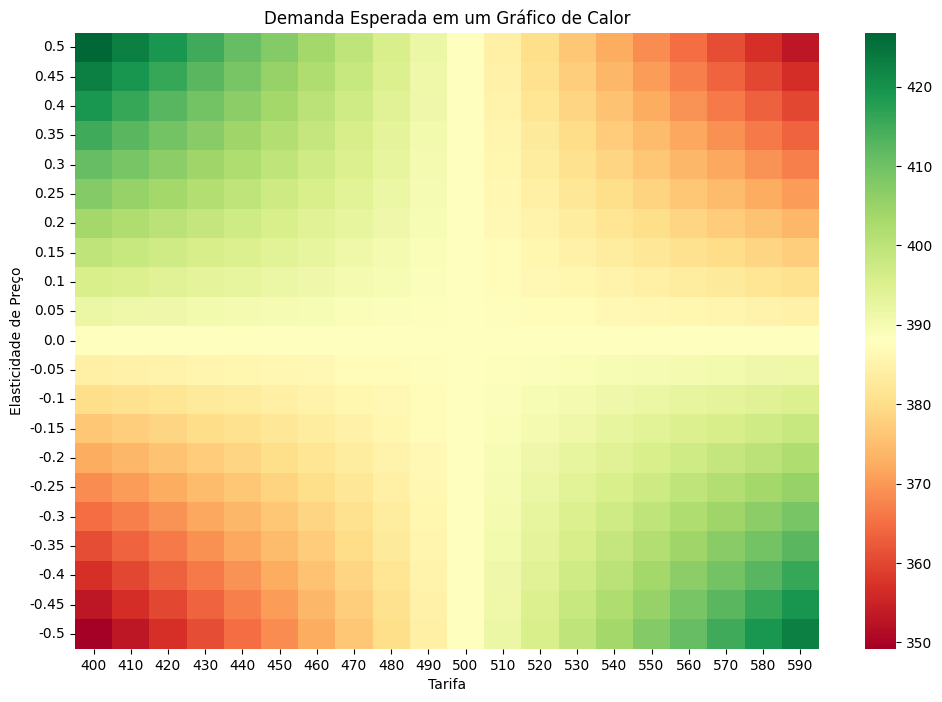

In [ ]:
# Criar o gráfico de calor (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(demandas_esperadas, cmap='RdYlGn', xticklabels=tarifas, yticklabels=elasticidades)
plt.xlabel('Tarifa')
plt.ylabel('Elasticidade de Preço')
plt.title('Demanda Esperada em um Gráfico de Calor')
plt.show()


## Vídeo 1.4 - Otimizando a função unidimensional do lucro sem restrições

In [ ]:
# Elasticidade de preço fixa
elasticidade = 0.1
# Intervalo de preços
tarifas = np.arange(0, 5000, 10)

In [ ]:
# Calcula o lucro estimado para cada preço
lucros_estimados = [estimar_lucro(tarifa, elasticidade) for tarifa in tarifas]

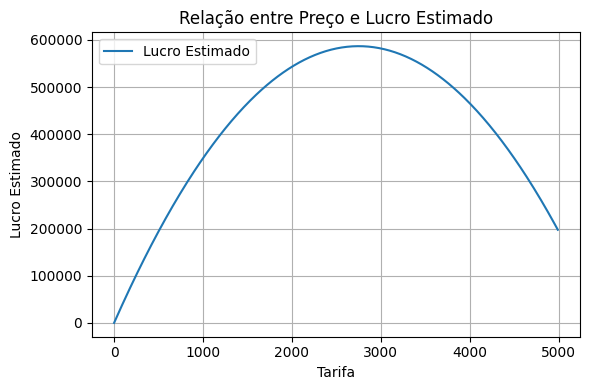

In [ ]:
# Gráfico do preço em relação ao lucro
plt.figure(figsize=(6, 4))
plt.plot(tarifas, lucros_estimados, label="Lucro Estimado")
plt.xlabel("Tarifa")
plt.ylabel("Lucro Estimado")
plt.title("Relação entre Preço e Lucro Estimado")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from scipy.optimize import minimize_scalar

In [ ]:
# Função para estimar o lucro

def funcao_objetivo(tarifa, elasticidade):
    lucro = estimar_lucro(tarifa, elasticidade)
    return -lucro  # Usamos -lucro porque estamos minimizando

In [ ]:
def encontrar_ponto_otimo(elasticidade):

    # Encontrar o preço que maximiza o lucro
    resultado = minimize_scalar(funcao_objetivo, args=(elasticidade),options={'disp':True}, method="golden")

    if resultado.success:
        preco_otimo = resultado.x
        lucro_otimo = -resultado.fun  # Retornamos o negativo, pois minimizamos o oposto do lucro
        return preco_otimo, lucro_otimo
    else:
        return None, None

In [ ]:
# Elasticidade de preço fixa (por exemplo, -0.2)
elasticidade = 0.1

In [ ]:
tarifa_otima, lucro_otimo = encontrar_ponto_otimo(elasticidade)
demanda_otima  = estimar_demanda(tarifa_otima, elasticidade)


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol = 1.4901161193847656e-08 )


In [ ]:
if tarifa_otima is not None:
    print(f"Preço Ótimo: {tarifa_otima}")
    print(f"Demanda esperada: {demanda_otima}")
    print(f"Lucro Máximo: {lucro_otimo}")
else:
    print("Não foi possível encontrar o ponto ótimo.")

Preço Ótimo: 2749.999970584623
Demanda esperada: 213.40000228263327
Lucro Máximo: 586850.0


# Aula 2 - Otimização unidimensional restrita

## Vídeo 2.1 - Detalhes do método de otimização unidimensional

In [ ]:
TARIFA = []
LUCRO = []

In [ ]:
def add_dados(tarifa, lucro):
    TARIFA.append(tarifa)
    LUCRO.append(lucro)

In [ ]:
def funcao_objetivo(tarifa, elasticidade):
    lucro = estimar_lucro(tarifa, elasticidade)
    add_dados(tarifa, lucro)
    return -lucro  # Usamos -lucro porque estamos minimizando

In [ ]:
tarifa_otima, lucro_otimo = encontrar_ponto_otimo(elasticidade)
demanda_otima  = estimar_demanda(tarifa_otima, elasticidade)


Optimization terminated successfully;
The returned value satisfies the termination criteria
(using xtol = 1.4901161193847656e-08 )


In [ ]:
tarifa_otima

2749.999970584623

In [ ]:
demanda_otima

213.40000228263327

In [ ]:
lucro_otimo

586850.0

In [ ]:
TARIFA

[0.0,
 1.0,
 2.6180339999999998,
 178.98373999999998,
 2750.000000000003,
 6909.991723232848,
 2750.000000000003,
 4338.975440156277,
 1767.9591775226795,
 3356.934608864489,
 2374.8937853812213,
 2981.8283908788812,
 2606.7221758758633,
 2838.5505654687286,
 2695.2727411978235,
 2783.8233061753363,
 2729.096047317097,
 2762.9193533048037,
 2742.015400600485,
 2754.934753833618,
 2746.950154425921,
 2751.8849082321613,
 2748.8350626549545,
 2750.7199708766566,
 2749.555033530415,
 2750.2750044030745,
 2749.830037933031,
 2750.105042334577,
 2749.9350802674303,
 2750.040122601421,
 2749.9752028687817,
 2750.0153254699776,
 2749.990528338731,
 2750.0058538086205,
 2749.996382147339,
 2750.002235955924,
 2749.9986181032564,
 2750.000854059165,
 2749.9994721624166,
 2750.0003262215732,
 2749.999798383986,
 2750.0001246055544,
 2749.9999229895375,
 2750.0000475950883,
 2749.999970584623,
 2749.999952404918]

In [ ]:
LUCRO

[0.0,
 426.72240000000005,
 1116.8450328828478,
 73904.3303272915,
 586850.0,
 -756059.2162595864,
 586850.0,
 390922.18712502084,
 512012.2358638741,
 558264.5175316507,
 575931.3174337391,
 582679.4343413627,
 585256.9856928659,
 586241.522674761,
 586617.5823463744,
 586761.224355247,
 586816.090721549,
 586837.0478080703,
 586845.0527029805,
 586848.1103006771,
 586849.2781990973,
 586849.7242965861,
 586849.8946906682,
 586849.9597754142,
 586849.9846355756,
 586849.9941313121,
 586849.9977583608,
 586849.99914377,
 586849.9996729493,
 586849.9998750776,
 586849.999952284,
 586849.9999817741,
 586849.9999930384,
 586849.9999973408,
 586849.9999989843,
 586849.9999996121,
 586849.9999998517,
 586849.9999999434,
 586849.9999999783,
 586849.9999999917,
 586849.9999999967,
 586849.9999999988,
 586849.9999999995,
 586849.9999999998,
 586850.0,
 586849.9999999998]

In [ ]:
# Intervalo de preços
tarifas = np.arange(0, 7000, 10)
# Calcula o lucro estimado para cada preço
lucros_estimados = [estimar_lucro(tarifa, elasticidade) for tarifa in tarifas]

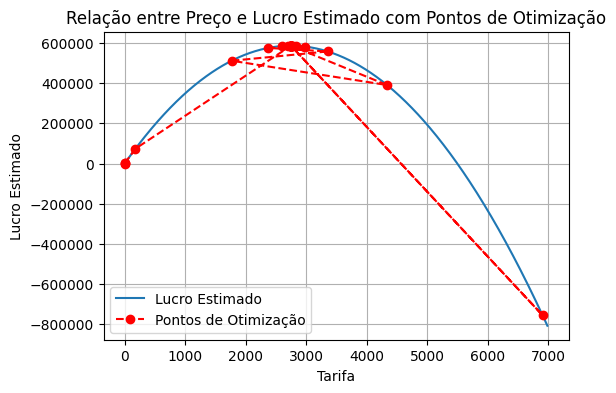

In [ ]:
# Gráfico do preço em relação ao lucro
plt.figure(figsize=(6, 4))
plt.plot(tarifas, lucros_estimados, label="Lucro Estimado")
plt.plot(TARIFA, LUCRO, marker='o', linestyle='--', color='red', label="Pontos de Otimização")
plt.xlabel("Tarifa")
plt.ylabel("Lucro Estimado")
plt.title("Relação entre Preço e Lucro Estimado com Pontos de Otimização")
plt.grid()
plt.legend()

## Vídeo 2.2 - Adicionando uma restrição

In [ ]:
# Parâmetros
precos = np.linspace(0, 5000, 100)  # Intervalo de preços de 0 a 100
elasticidade = 0.1
capacidade = 300  # Capacidade disponível do avião

# Calcular lucro e demanda esperados para cada preço
lucros = [estimar_lucro(preco, elasticidade) for preco in precos]
demandas = [estimar_demanda(preco,  elasticidade) for preco in precos]

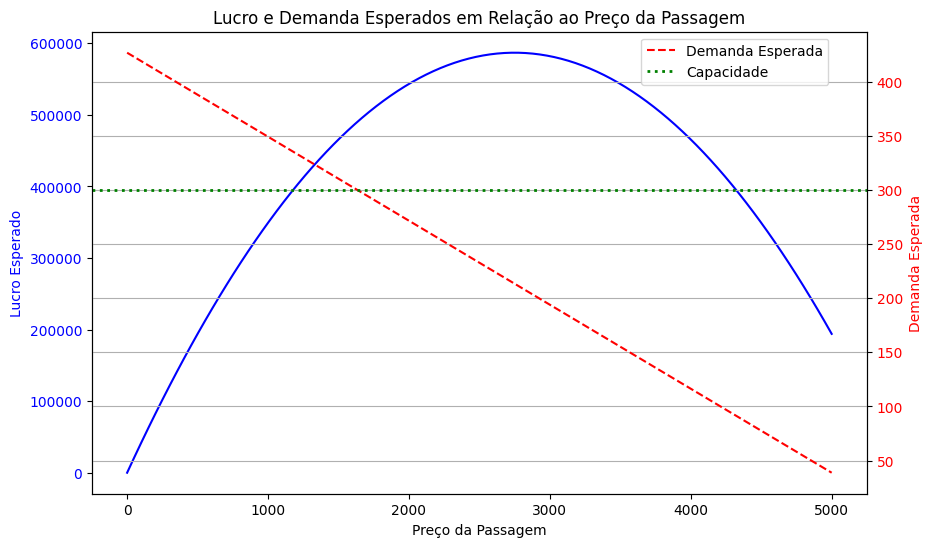

In [ ]:
# Plotar gráfico
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primeiro eixo (y1) - Lucro Esperado
ax1.plot(precos, lucros, label='Lucro Esperado', color='blue')
ax1.set_xlabel('Preço da Passagem')
ax1.set_ylabel('Lucro Esperado', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Segundo eixo (y2) - Demanda Esperada
ax2 = ax1.twinx()
ax2.plot(precos, demandas, label='Demanda Esperada', color='red', linestyle='--')
ax2.axhline(y=capacidade, color='green', linestyle=':', label='Capacidade', linewidth=2)
ax2.set_ylabel('Demanda Esperada', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Lucro e Demanda Esperados em Relação ao Preço da Passagem')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))
plt.grid()
plt.show()

In [ ]:
def funcao_objetivo_rest_capacidade(tarifa, elasticidade, capacidade, peso_demanda):
    lucro = estimar_lucro(tarifa, elasticidade)
    demanda =  estimar_demanda(tarifa, elasticidade)
    return -lucro + peso_demanda * (demanda - capacidade)  # Usamos -lucro porque estamos minimizando

In [ ]:
def encontrar_ponto_otimo(elasticidade, capacidade, peso_demanda):
    # Limites do preço (vamos considerar preços entre 50 e 150)
    limite_inferior = 0
    limite_superior = 10000

    # Encontrar o preço que maximiza o lucro
    resultado = minimize_scalar(funcao_objetivo_rest_capacidade, args=(elasticidade, capacidade, peso_demanda), bounds=(limite_inferior, limite_superior))

    if resultado.success:
        preco_otimo = resultado.x
        lucro_otimo = -resultado.fun  # Retornamos o negativo, pois minimizamos o oposto do lucro
        return preco_otimo, lucro_otimo
    else:
        return None, None

In [ ]:
# Elasticidade de preço fixa (por exemplo, -0.2)
elasticidade = 0.1
capacidade = 200
peso_demanda = 100

tarifa_otima, lucro_otimo = encontrar_ponto_otimo(elasticidade, capacidade, peso_demanda)
demanda_otima  = estimar_demanda(tarifa_otima, elasticidade)


In [ ]:
tarifa_otima

2800.0000000000005

In [ ]:
demanda_otima

209.51999999999992

In [ ]:
lucro_otimo

585703.9999999999

## Vídeo 2.3 - Analisando o impacto da restrição na otimização

In [ ]:
TARIFA = []
LUCRO = []
DEMANDA = []

In [ ]:
def add_dados(tarifa, lucro, demanda):
    TARIFA.append(tarifa)
    LUCRO.append(lucro)
    DEMANDA.append(demanda)

In [ ]:
def funcao_objetivo_rest_capacidade(tarifa, elasticidade, capacidade, peso_demanda):
    lucro = estimar_lucro(tarifa, elasticidade)
    demanda =  estimar_demanda(tarifa, elasticidade)
    add_dados(tarifa, lucro, demanda)
    return -lucro + peso_demanda * (demanda - capacidade)  # Usamos -lucro porque estamos minimizando

In [ ]:
def encontrar_ponto_otimo(elasticidade, capacidade, peso_demanda):
    # Limites do preço (vamos considerar preços entre 50 e 150)
    limite_inferior = 0
    limite_superior = 10000

    # Encontrar o preço que maximiza o lucro
    resultado = minimize_scalar(funcao_objetivo_rest_capacidade, args=(elasticidade, capacidade, peso_demanda), bounds=(limite_inferior, limite_superior))

    if resultado.success:
        preco_otimo = resultado.x
        lucro_otimo = -resultado.fun  # Retornamos o negativo, pois minimizamos o oposto do lucro
        return preco_otimo, lucro_otimo
    else:
        return None, None

In [ ]:
# Elasticidade de preço fixa (por exemplo, -0.2)
elasticidade = 0.1
capacidade = 200
peso_demanda = 1000

tarifa_otima, lucro_otimo = encontrar_ponto_otimo(elasticidade, capacidade, peso_demanda)
demanda_otima  = estimar_demanda(tarifa_otima, elasticidade)


In [ ]:
tarifa_otima

3250.0

In [ ]:
demanda_otima

174.6

In [ ]:
lucro_otimo

592850.0

In [ ]:
TARIFA

[3819.660112501051,
 6180.339887498948,
 2360.679774997897,
 3250.0,
 3250.0000515386237,
 3249.9999484613763]

In [ ]:
LUCRO

[498062.19411300094,
 -326287.18331626424,
 575088.1495625746,
 567450.0,
 567449.9960006025,
 567450.0039993969]

In [ ]:
DEMANDA

[130.39437526991844,
 -52.794375269918326,
 243.61124946016318,
 174.6,
 174.59999600060277,
 174.60000399939716]

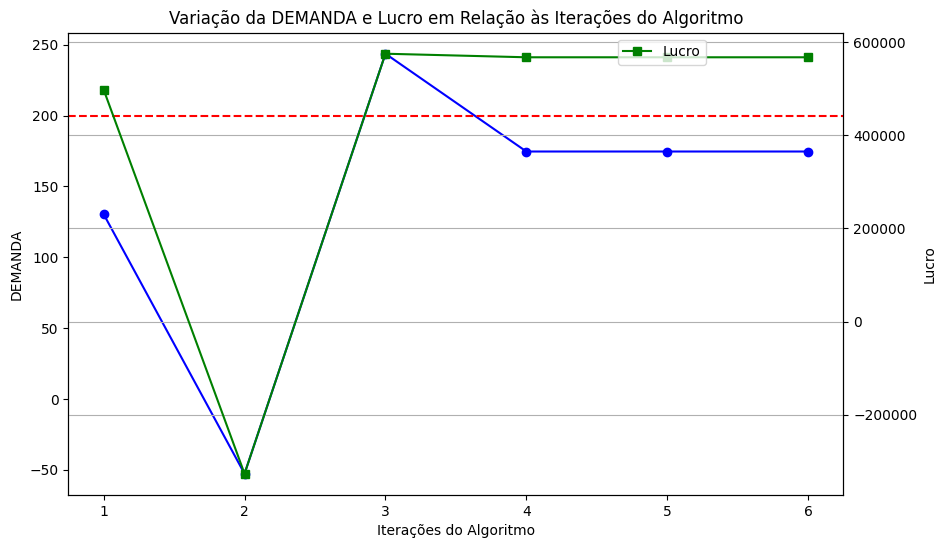

In [ ]:
# Capacidade

# Número de iterações (para o eixo x)
iteracoes = list(range(1, len(DEMANDA) + 1))

# Gráfico da DEMANDA em relação às iterações
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
plt.plot(iteracoes, DEMANDA, marker='o', linestyle='-', color='b', label='DEMANDA')
plt.axhline(y=capacidade, color='r', linestyle='--', label='Capacidade')
plt.xlabel('Iterações do Algoritmo')
plt.ylabel('DEMANDA')
plt.twinx()  # Adiciona um segundo eixo y
plt.plot(iteracoes, LUCRO, marker='s', linestyle='-', color='g', label='Lucro')  # Adicione LUCRO ao segundo eixo y
plt.ylabel('Lucro')  # Label para o segundo eixo y
plt.title('Variação da DEMANDA e Lucro em Relação às Iterações do Algoritmo')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))  # Posição da legenda
plt.grid(True)
plt.show()


# Aula 3 - Otimização multidimensional irrestrita

## Vídeo 3.1 - Entendendo o processo de precificação para vários dias

In [ ]:
# Função objetivo a ser maximizada
def estimar_lucro_dias(tarifas, elasticidades):
    lucro_total = 0
    for dia, tarifa in enumerate(tarifas):
      lucro_dia = estimar_lucro(tarifa, elasticidades[dia])
      lucro_total += lucro_dia

    lucro_total
    return lucro_total  # Minimizamos o negativo do lucro para maximizar o lucro real

In [ ]:
# Função objetivo a ser maximizada
def estimar_demanda_dias(tarifas, elasticidades):
    demanda_total = 0
    for dia, tarifa in enumerate(tarifas):
      demanda_dia = estimar_demanda(tarifa, elasticidades[dia])
      demanda_total += demanda_dia
    return demanda_total  # Minimizamos o negativo do lucro para maximizar o lucro real

In [ ]:
# Função objetivo a ser maximizada
def funcao_objetivo_dias(tarifas, elasticidades):
    lucro_total = estimar_lucro_dias(tarifas, elasticidades)
    return -lucro_total  # Minimizamos o negativo do lucro para maximizar o lucro real


In [ ]:
# Elasticidades para cada dia de antecedência (exemplo)
elasticidades = [0.1,0.11, 0.12, 0.13, 0.15, 0.2, 0.25, 0.30, 0.40, 0.41]

# Chute inicial para as tarifas (pode ser um valor inicial para cada dia)
tarifas_iniciais = [100] * len(elasticidades)


In [ ]:
elasticidades

[0.1, 0.11, 0.12, 0.13, 0.15, 0.2, 0.25, 0.3, 0.4, 0.41]

In [ ]:
tarifas_iniciais

[100, 100, 100, 100, 100, 100, 100, 100, 100, 100]

## Vídeo 3.2 - Otimizando a função multidimensional do lucro sem restrições

In [ ]:
from scipy.optimize import minimize

In [ ]:
# Resolver o problema de otimização
resultado = minimize(funcao_objetivo_dias, tarifas_iniciais, args=(elasticidades,), options={'disp': True})

Optimization terminated successfully.
         Current function value: -3939440.360338
         Iterations: 42
         Function evaluations: 649
         Gradient evaluations: 59


In [ ]:
resultado

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -3939440.3603382623
        x: [ 2.750e+03  2.523e+03  2.333e+03  2.173e+03  1.917e+03
             1.500e+03  1.250e+03  1.083e+03  8.750e+02  8.597e+02]
      nit: 42
      jac: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
             0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 1.532e-03 -4.802e-03 ... -4.161e-03 -5.920e-03]
            [-4.802e-03  1.846e-02 ...  1.747e-02  2.228e-02]
            ...
            [-4.161e-03  1.747e-02 ...  3.468e-02  2.909e-02]
            [-5.920e-03  2.228e-02 ...  2.909e-02  1.747e-01]]
     nfev: 649
     njev: 59

In [ ]:
# Tarifas ótimas para cada dia
tarifas_otimas = resultado.x

print("Tarifas  para Cada Dia:", tarifas_otimas)
print("Lucro Esperado:", estimar_lucro_dias(tarifas_otimas, elasticidades))  # Converter o valor negativo de volta para o lucro positivo
print("Demanda Esperada:", estimar_demanda_dias(tarifas_otimas, elasticidades))


Tarifas  para Cada Dia: [2749.84329396 2522.78560276 2333.30495339 2173.0206126  1916.66629874
 1500.02857852 1249.94938136 1083.33117569  875.00207453  859.74740014]
Lucro Esperado: 3939440.3603382623
Demanda Esperada: 2361.0035576724895


## Vídeo 3.3 - Métodos de otimização multidimensional sem restrições

In [ ]:
TARIFAS_DIA0 = []
TARIFAS_DIA1 = []
LUCRO = []

In [ ]:
def add_dados(tarifas, lucro):
    TARIFAS_DIA0.append(tarifas[0])
    TARIFAS_DIA1.append(tarifas[1])
    LUCRO.append(lucro)

In [ ]:
# Função objetivo a ser maximizada
def estimar_lucro_dias(tarifas, elasticidades):
    lucro_total = 0
    for dia, tarifa in enumerate(tarifas):
        lucro_dia = estimar_lucro(tarifa, elasticidades[dia])
        lucro_total += lucro_dia
    return lucro_total  # Minimizamos o negativo do lucro para maximizar o lucro real

In [ ]:
# Função objetivo a ser maximizada
def estimar_demanda_dias(tarifas, elasticidades):
    demanda_total = 0
    for dia, tarifa in enumerate(tarifas):
        demanda_dia = estimar_demanda(tarifa, elasticidades[dia])
        demanda_total += demanda_dia
    return demanda_total

In [ ]:
# Função objetivo a ser maximizada
def funcao_objetivo_dias(tarifas, elasticidades):
    lucro_total = estimar_lucro_dias(tarifas, elasticidades)
    #add_dados(tarifas, lucro_total)
    return -lucro_total  # Minimizamos o negativo do lucro para maximizar o lucro real

In [ ]:
# Elasticidades para cada dia de antecedência (exemplo)
elasticidades = [0.1, 0.11]


In [ ]:
# Chute inicial para as tarifas (pode ser um valor inicial para cada dia)
tarifas_iniciais = [100] * len(elasticidades)

In [ ]:
# Resolver o problema de otimização com a função de callback
resultado = minimize(funcao_objetivo_dias, tarifas_iniciais, args=(elasticidades,), options={'disp': True}, callback=lambda xk: add_dados(xk, estimar_lucro_dias(xk, elasticidades)))

Optimization terminated successfully.
         Current function value: -1130094.090579
         Iterations: 6
         Function evaluations: 36
         Gradient evaluations: 12


In [ ]:
TARIFAS_DIA0, TARIFAS_DIA1

([1072.0963618748688,
  2643.695548810542,
  2662.1507480217656,
  2700.164589351129,
  2749.814362166917,
  2750.0161235590126],
 [1077.601394091512,
  2618.7268591397556,
  2604.260554423872,
  2569.3572637259276,
  2522.942448973553,
  2522.667051699126])

In [ ]:
LUCRO

[733357.2384840341,
 1128430.4905472188,
 1128927.7679763883,
 1129715.762986971,
 1130094.0842826483,
 1130094.0905793533]

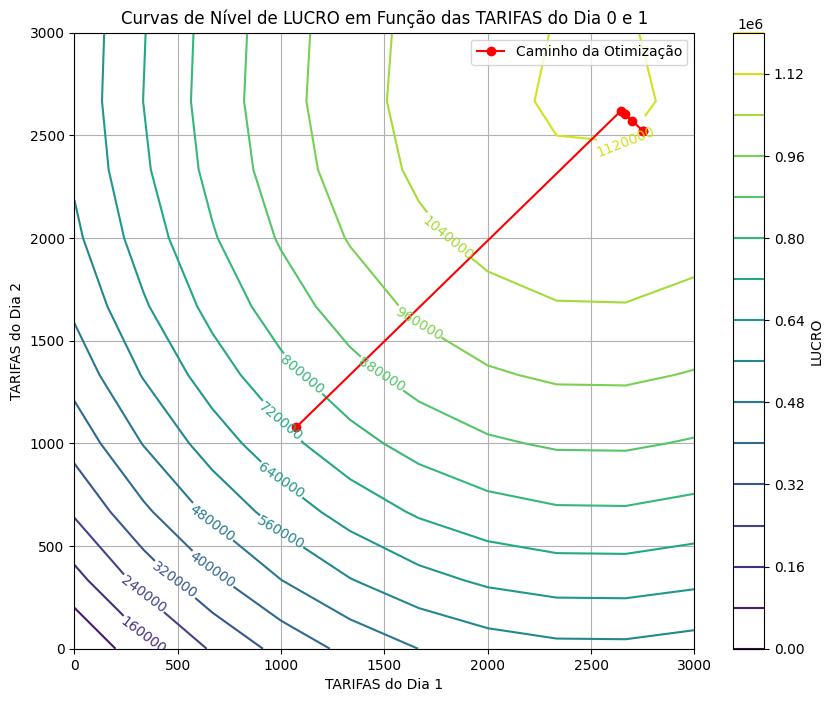

In [ ]:
# Intervalo de valores para as TARIFAS do dia 1 e 2
tarifas_dia0 = np.linspace(0, 3000, 10)  # Intervalo de 0 a 100 para TARIFAS do dia 1
tarifas_dia1 = np.linspace(0, 3000, 10)  # Intervalo de 0 a 100 para TARIFAS do dia 2

# Cria uma matriz de valores de LUCRO com base nas TARIFAS do dia 1 e 2
lucros = np.zeros((len(tarifas_dia0), len(tarifas_dia1)))

for i, tarifa1 in enumerate(tarifas_dia0):
    for j, tarifa2 in enumerate(tarifas_dia1):
        lucros[i][j] = estimar_lucro_dias([tarifa1, tarifa2], elasticidades)

# Calcula as cores com base no valor do lucro (verde para maior lucro, vermelho para menor lucro)
colors = lucros / lucros.max()

# Cria o gráfico de curvas de nível com cores
plt.figure(figsize=(10, 8))
contour = plt.contour(tarifas_dia0, tarifas_dia1, lucros, levels=15, cmap='viridis')
plt.clabel(contour, inline=1, fontsize=10)
plt.xlabel('TARIFAS do Dia 1')
plt.ylabel('TARIFAS do Dia 2')
plt.title('Curvas de Nível de LUCRO em Função das TARIFAS do Dia 0 e 1')
plt.colorbar(label='LUCRO')
plt.grid(True)

# Adiciona o caminho percorrido pelo algoritmo
plt.plot(TARIFAS_DIA0, TARIFAS_DIA1, '-ro', label='Caminho da Otimização')

plt.legend()

# Aula 4 - Otimização multidimensional restrita

## Vídeo 4.1 - Entendendo o processo de precificação para vários dias com restrições

In [ ]:
# Restrições
def restricao_capacidade(tarifas, args):
    elasticidades, capacidade = args
    return capacidade - estimar_demanda_dias(tarifas, elasticidades)

In [ ]:
def restricao_aumento_tarifa(tarifas):
    return [tarifas[i] - tarifas[i + 1] for i in range(len(tarifas)-1)]

# Elasticidades para cada dia de antecedência (exemplo)
elasticidades = [0.1,0.11, 0.12, 0.13, 0.15, 0.2, 0.25, 0.30, 0.40, 0.41]

# Chute inicial para as tarifas (pode ser um valor inicial para cada dia)
tarifas_iniciais = [100] * len(elasticidades)

# Capacidade total para todos os dias (exemplo)
capacidade = 300


In [ ]:
print("Tarifas  para Cada Dia:", tarifas_otimas)
print("Lucro Esperado:", estimar_lucro_dias(tarifas_otimas, elasticidades))  # Converter o valor negativo de volta para o lucro positivo
print("Demanda Esperada:", estimar_demanda_dias(tarifas_otimas, elasticidades))

Tarifas  para Cada Dia: [2749.84329396 2522.78560276 2333.30495339 2173.0206126  1916.66629874
 1500.02857852 1249.94938136 1083.33117569  875.00207453  859.74740014]
Lucro Esperado: 3939440.3603382623
Demanda Esperada: 2361.0035576724895


In [ ]:
print("Restrição capacidade:", restricao_capacidade(tarifas_otimas,( elasticidades, capacidade)))
print("Restrição aumento da tarifa:", restricao_aumento_tarifa(tarifas_otimas))

Restrição capacidade: -2061.0035576724895
Restrição aumento da tarifa: [227.05769120104515, 189.4806493652709, 160.28434079228737, 256.3543138580228, 416.6377202279441, 250.0791971582462, 166.61820566349525, 208.32910116628796, 15.254674392690163]


## Vídeo 4.2 - Otimizando a função multidimensional do lucro com restrições

In [ ]:
cons = [
    {
        'type': 'ineq',
        'fun': restricao_capacidade,
        'args': ((elasticidades, capacidade),)
    },
    {
        'type': 'ineq',
        'fun': restricao_aumento_tarifa,
    }
]

In [ ]:
# Resolver o problema de otimização com restrições
resultado = minimize(
    fun=funcao_objetivo_dias,
    x0=tarifas_iniciais,
    args=(elasticidades,),
    constraints=cons,
    options={'disp': True}
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1416969.8423640784
            Iterations: 27
            Function evaluations: 314
            Gradient evaluations: 26


In [ ]:
# Tarifas ótimas para cada dia
tarifas_otimas = list(resultado.x)
lucro_esperado = estimar_lucro_dias(tarifas_otimas, elasticidades)
demanda_esperada =estimar_demanda_dias(tarifas_otimas, elasticidades)

In [ ]:
# Resultados
print("Tarifas Ótimas para Cada Dia:", tarifas_otimas)
print("Lucro Esperado:", lucro_esperado)  # Converter o valor negativo de volta para o lucro positivo
print("Demanda Esperada:", demanda_esperada)

Tarifas Ótimas para Cada Dia: [3973.922835314228, 3746.656310319915, 3557.274648215115, 3396.982349005809, 3140.5722735985387, 2723.904651142521, 2473.938456599243, 2307.2488152663686, 2098.917543545604, 2083.6679839086155]
Lucro Esperado: 1416969.8423640784
Demanda Esperada: 300.000000165837


## Vídeo 4.3 - Métodos de otimização multidimensional com restrições

In [ ]:
from scipy.optimize import minimize

In [ ]:
TARIFAS_DIA0 = []
TARIFAS_DIA1 = []
DEMANDA = []
LUCRO = []

In [ ]:
def add_dados(tarifas, lucro, demanda):
    TARIFAS_DIA0.append(tarifas[0])
    TARIFAS_DIA1.append(tarifas[1])
    DEMANDA.append(demanda)
    LUCRO.append(lucro)

In [ ]:
# Elasticidades para cada dia de antecedência (exemplo)
elasticidades = [0.1, 0.11]
# Capacidade total para todos os dias (exemplo)
capacidade = 50

In [ ]:
# Chute inicial para as tarifas (pode ser um valor inicial para cada dia)
tarifas_iniciais = [1000000] * len(elasticidades)

In [ ]:
cons = [
    {
        'type': 'ineq',
        'fun': restricao_capacidade,
        'args': ((elasticidades, capacidade),)
    },
    {
        'type': 'ineq',
        'fun': restricao_aumento_tarifa,
    }
]

In [ ]:
# Resolver o problema de otimização com restrições
resultado = minimize(
    fun=funcao_objetivo_dias,
    x0=tarifas_iniciais,
    args=(elasticidades,),
    constraints=cons,
    options={'disp': True},
    callback=lambda xk: add_dados(
        xk,
        estimar_lucro_dias(xk, elasticidades),
        estimar_demanda_dias(xk, elasticidades)
    )
)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -249853.6177686893
            Iterations: 11
            Function evaluations: 44
            Gradient evaluations: 11


In [ ]:
# Tarifas ótimas para cada dia
tarifas_otimas = list(resultado.x)
lucro_esperado = estimar_lucro_dias(tarifas_otimas, elasticidades)
demanda_esperada = estimar_demanda_dias(tarifas_otimas, elasticidades)

In [ ]:
# Resultados
print("Tarifas Ótimas para Cada Dia:", tarifas_otimas)
print("Lucro Esperado:", lucro_esperado)  # Converter o valor negativo de volta para o lucro positivo
print("Demanda Esperada:", demanda_esperada)

Tarifas Ótimas para Cada Dia: [5074.129187833937, 4846.855376007111]
Lucro Esperado: 249853.6177686893
Demanda Esperada: 50.00000012811948


In [ ]:
DEMANDA

[-135514.40096,
 -24306.248043742176,
 31.22152466982743,
 49.946510537367885,
 49.778160196607416,
 49.99388476361942,
 49.99999889506225,
 49.99999988824261,
 49.999999923168986,
 50.00000012817195,
 50.00000007478085]

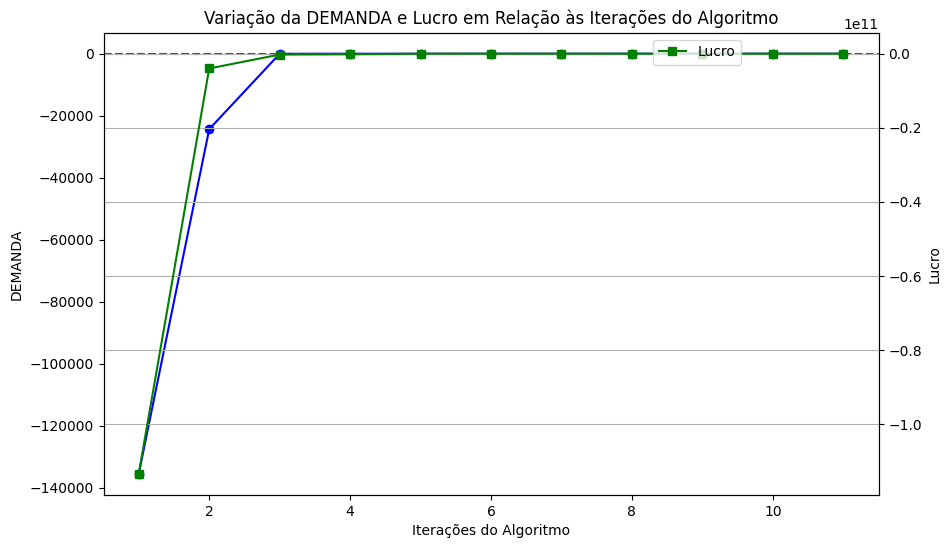

In [ ]:
# Capacidade

# Número de iterações (para o eixo x)
iteracoes = list(range(1, len(DEMANDA) + 1))

# Gráfico da DEMANDA em relação às iterações
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
plt.plot(iteracoes, DEMANDA, marker='o', linestyle='-', color='b', label='DEMANDA')
plt.axhline(y=capacidade, color='r', linestyle='--', label='Capacidade')
plt.xlabel('Iterações do Algoritmo')
plt.ylabel('DEMANDA')
plt.twinx()  # Adiciona um segundo eixo y
plt.plot(iteracoes, LUCRO, marker='s', linestyle='-', color='g', label='Lucro')  # Adicione LUCRO ao segundo eixo y
plt.ylabel('Lucro')  # Label para o segundo eixo y
plt.title('Variação da DEMANDA e Lucro em Relação às Iterações do Algoritmo')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))  # Posição da legenda
plt.grid(True)
plt.show()
